# Car Price Prediction

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [140]:
# Load the dataset
df = pd.read_csv("car_data.csv")

# Display the first few rows of the dataset
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [142]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [143]:
df['Fuel_Type_Encoded'] = df['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
df['Transmission_Encoded'] = df['Transmission'].map({'Manual': 0, 'Automatic': 1})
df['Owner_num'] = pd.to_numeric(df['Owner'], errors='coerce').fillna(0).astype(int)

In [144]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Fuel_Type_Encoded,Transmission_Encoded,Owner_num
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1,0,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1,0,0


In [145]:
# Ensure all categorical columns are included
categorical_columns = ['Fuel_Type_Encoded', 'Transmission_Encoded']


In [146]:
# Define features and target variable
if 'Selling_Price' in df.columns:
    X = df.drop('Selling_Price', axis=1)
    y = df['Selling_Price']
else:
    raise ValueError("Missing target column: Selling_Price")


In [147]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling and Encoding
numeric_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
categorical_features = [col for col in categorical_columns if col in X.columns]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [148]:
# Model Pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [149]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Present_Price',
                                                   'Driven_kms', 'Owner',
                                                   'Fuel_Type_Encoded',
                                                   'Transmission_Encoded']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Fuel_Type_Encoded',
                                                   'Transmission_Encoded'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [150]:
# Make predictions
y_pred = model.predict(X_test)

In [151]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 0.613739344262295
Mean Squared Error: 0.8764544496721308
Root Mean Squared Error: 0.9361914599440281
R2 Score: 0.9619521506432741


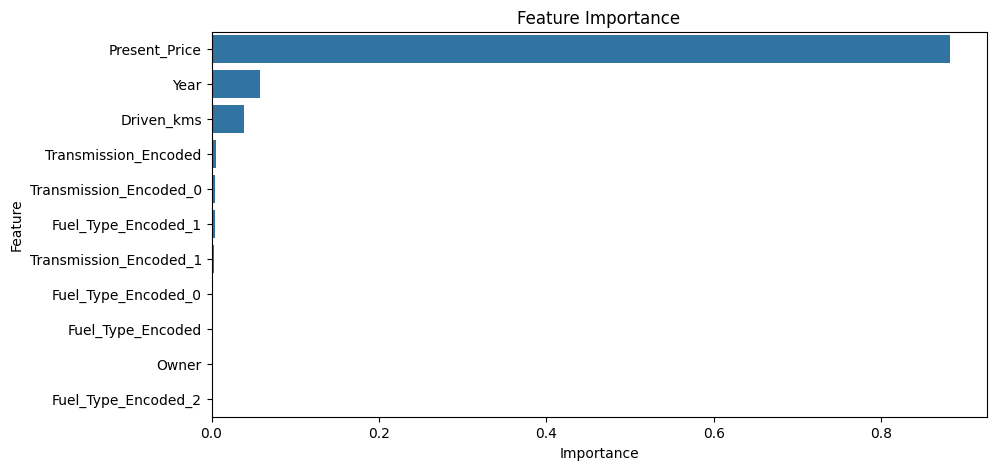

In [152]:
# Feature Importance
feature_importances = model.named_steps['regressor'].feature_importances_
feature_names = numeric_features + list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title('Feature Importance')
plt.show()

In [177]:

# Function to Predict Car Price
def predict_car_price():
    example_car = pd.DataFrame({
        'Year': [2018],
        'Present_Price': [8.5],
        'Driven_kms': [45000],
        'Fuel_Type_Encoded': [1],  # Diesel
        'Transmission_Encoded': [0],  # Manual
        'Owner_num': [1]
    })
    
    # Ensure example_car has the same columns as X
    missing_cols = set(X.columns) - set(example_car.columns)
    for col in missing_cols:
        example_car[col] = 0  # Add missing columns with default values

    example_car = example_car[X.columns]  # Ensure the order matches
    predicted_price = model.predict(example_car)
    print(f"Predicted Selling Price: {predicted_price[0]:.2f} lakhs")

# Uncomment below to test prediction
predict_car_price()


Predicted Selling Price: 6.59 lakhs


In [187]:
def predict_multiple_cars():
    example_cars = pd.DataFrame({
        'Year': [2015, 2020, 2018],
        'Present_Price': [5.5, 10.0, 8.5],
        'Driven_kms': [60000, 30000, 45000],
        'Fuel_Type_Encoded': [0, 1, 1],  # Petrol, Diesel, Diesel
        'Transmission_Encoded': [0, 1, 0],  # Manual, Auto, Manual
        'Owner_num': [1, 0, 1]
    })
    # Ensure example_car has the same columns as X
    missing_cols = set(X.columns) - set(example_cars.columns)
    for col in missing_cols:
        example_cars[col] = 0  # Add missing columns with default values
    
    example_cars = example_cars[X.columns]
    predicted_prices = model.predict(example_cars)
    
    for i, price in enumerate(predicted_prices):
        print(f"Car {i+1} Predicted Selling Price: {price:.2f} lakhs")

# Uncomment below to test multiple predictions
predict_multiple_cars()


Car 1 Predicted Selling Price: 3.42 lakhs
Car 2 Predicted Selling Price: 7.90 lakhs
Car 3 Predicted Selling Price: 6.59 lakhs
